In [3]:
# !pip3 install pandas
import matplotlib.pyplot as plt
import numpy
import pandas as pd

In [6]:
labels = ["1", "2", "5", "10"]

baseline_novel = [53.79, 67.48, 77.97, 82.32]
baseline_all = [61.50, 72.10, 80.31, 83.48]

kgtn_cossim_novel = [60.15, 69.69, 77.30, 81.89]
kgtn_cossim_all = [65.94, 74.05, 80.05, 83.39]

kgtn_hierachy_novel = [60.35, 69.71, 78.31, 82.34]
kgtn_hierachy_all = [66.98, 74.46, 80.76, 83.36]

wiki_novel = [56.65, 68.21, 77.31, 81.88]
wiki_all = [64.59, 73.32, 80.03, 83.44]


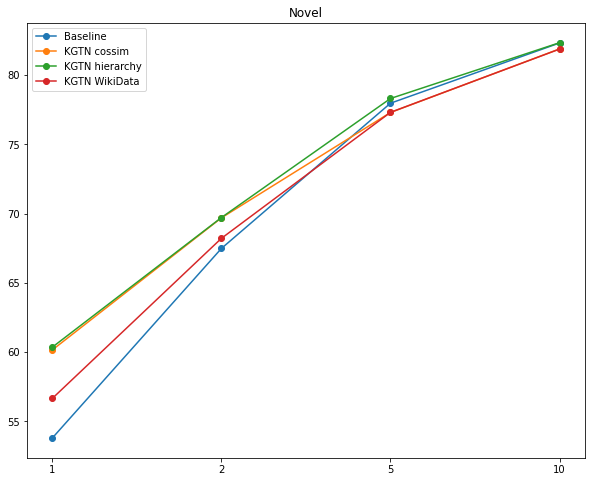

In [20]:
plt.figure(figsize=(10,8))
plt.plot(labels, baseline_novel, marker='o', label="Baseline")
plt.plot(labels, kgtn_cossim_novel, marker='o', label="KGTN cossim")
plt.plot(labels, kgtn_hierachy_novel, marker='o', label="KGTN hierarchy")
plt.plot(labels, wiki_novel, marker='o', label="KGTN WikiData")
plt.legend()
plt.title("Novel")
plt.show()

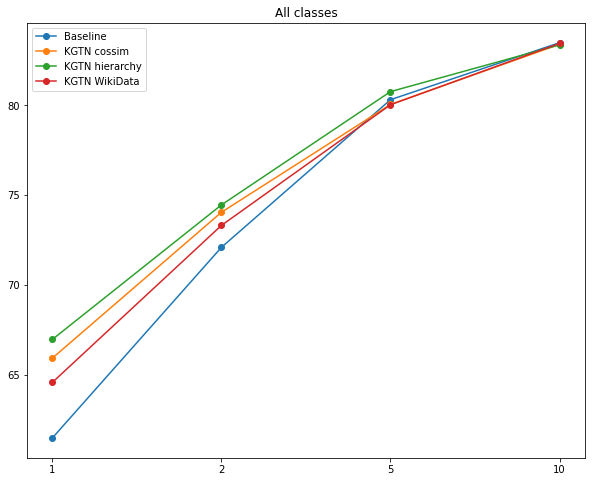

In [21]:
plt.figure(figsize=(10,8))
plt.plot(labels, baseline_all, marker='o', label="Baseline")
plt.plot(labels, kgtn_cossim_all, marker='o', label="KGTN cossim")
plt.plot(labels, kgtn_hierachy_all, marker='o', label="KGTN hierarchy")
plt.plot(labels, wiki_all, marker='o', label="KGTN WikiData")
plt.legend()
plt.title("All classes")
plt.show()